# Аналитика данных с помощью `pandas` и `matplotlib`

В этом задании вам предлагается выполнить анализ данных криптовалют с помощью библиотек pandas и matplotlib.
Задание выглядит как лабораторная работа, в которой вам предстоит заполнить недостающие клетки и ответить на ряд вопросов.
 - [Официальная документация pandas](https://pandas.pydata.org/)
 - [Официальная документация matplotlib](https://matplotlib.org/index.html)

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если набран как минимум 1 балл.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект:
- заполняете данный ноутбук
- создаете приватный репозиторий в GitHub
- добавляете в него проверяющего
- загружаете заполненный ноутбук в отдельную ветку
- создаете MR с указанием проверяющего

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

## 1. Данные (2 балла)

Скачиваем данные для работы:

In [1]:
%%bash
gdown 1l-vkTaM1sK0g2jWHkwiFWDtWjCrac9uM

Downloading...
From: https://drive.google.com/uc?id=1l-vkTaM1sK0g2jWHkwiFWDtWjCrac9uM
To: /content/coins.csv
100%|██████████| 3.98M/3.98M [00:00<00:00, 47.6MB/s]


Начнем с необходимых приготовлений.

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е

%matplotlib inline

#### Загрузите заранее подготовленный датасет из файла `coins.csv`. Создайте объект типа `pandas.DataFrame` с именем `coins` и в качестве индекса выберите колонку с датой.

In [42]:
coins = pd.read_csv('coins.csv', index_col='date')

Посмотрим что получилось

In [43]:
coins.head(4)

,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
date,,,,,,,,,,,,
2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09
2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07
2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09
2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07


Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

Изучим полученные данные. Ответьте на следующие вопросы (вставляйте клетки с кодом и тектом ниже):

### 1. Сколько всего различных монет представлено в датасете? (0.4 балла)

In [44]:
num_unique_coins = coins['name'].nunique()
num_unique_coins

70

### 2. За какой период данные мы имеем? (0.4 балла)

In [45]:
start_date = coins.index.min()
end_date = coins.index.max()
start_date, end_date

('2013-04-28', '2018-06-06')

### 3. Есть ли пропуски в данных? Какой природы эти пропуски, чем они скорее всего вызваны? (0.5 балла)

In [46]:
print("Наличие пропусков: ", sum(coins.isnull().sum()) > 0)
coins.isnull().sum()

Наличие пропусков:  True


price               327
txCount            1520
txVolume           1830
activeAddresses    1520
symbol                0
name                  0
open                  0
high                  0
low                   0
close                 0
volume                0
market                0
dtype: int64

### 4. У какой монеты и когда была самая высокая цена? (0.2 балла)

In [47]:
max_price_row = coins[coins['high'] == coins['high'].max()]
max_price_row[['name', 'high']]

,name,high
date,,
2017-12-17,Bitcoin,20089.0


### 5. У какой монеты самая высокая и самая низкая средняя капитализация (среднее арифметическое капитализаций за все доступные дни)? Постройте круговую диаграмму с долями. (0.5 балла)

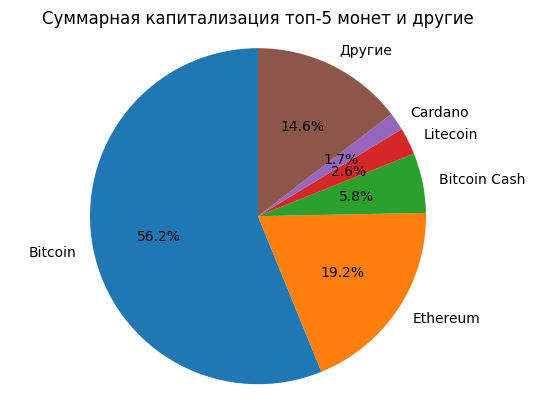

In [48]:
totals = coins.groupby("name")["market"].sum().sort_values(ascending=False)
top_n = 5
top_coins = totals.head(top_n)
other_coins = totals.iloc[top_n:]

other_sum = other_coins.sum()
top_coins['Другие'] = other_sum


fig, ax = plt.subplots()
ax.pie(top_coins,
       labels=top_coins.index,
       autopct='%1.1f%%',
       startangle=90)
ax.axis('equal')
plt.title('Суммарная капитализация топ-5 монет и другие')
plt.show()


## 2. Визуализация (1 балл)

Самая интересная часть работы аналитика состоит во внимательном вглядывании в правильно выбранные и построенные графики.

**Реализуйте функцию для визуализации цен выбранной валюты за выбранный диапазон дат.**

На графике должны быть видны цены начала и конца продаж. А так же минимальная и максимальная цена за этот день.
Подпишите график и оси координат. Добавьте сетку. Увеличьте размер изображения.
Можете попробовать использовать `candlestick_ohlc` (`from mplfinance.original_flavor import candlestick_ohlc`), но можно и без него.

In [49]:
!pip install mplfinance


In [50]:


def plot_fancy_price_action(coins, symbol, start_date, end_date):

    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111)

    ax.set_xlabel('Date', size=25)
    ax.set_ylabel('Price', size=25)
    plt.title(f'Price of {symbol} from {start_date} to {end_date}', fontsize=20)

    table = coins.loc[(coins['symbol'] == symbol), ['open', 'close', 'high', 'low']]
    table = coins[(coins.symbol == symbol) & (start_date <= coins.index) & (end_date >= coins.index)]

    x = table.index
    y1 = table.high
    y2 = table.low
    y3 = table.open
    y4 = table.close

    ax.plot(x, y1, color='black', label="")
    ax.plot(x, y2, color='blue', label="")
    ax.plot(x, y3, color='red', label="")
    ax.plot(x, y4, color='green', label="")

    ax.set_xticks(table.index.values[::table.shape[0] // 10])

    plt.grid(True)
    plt.show()


Посмотрим, что получилось:

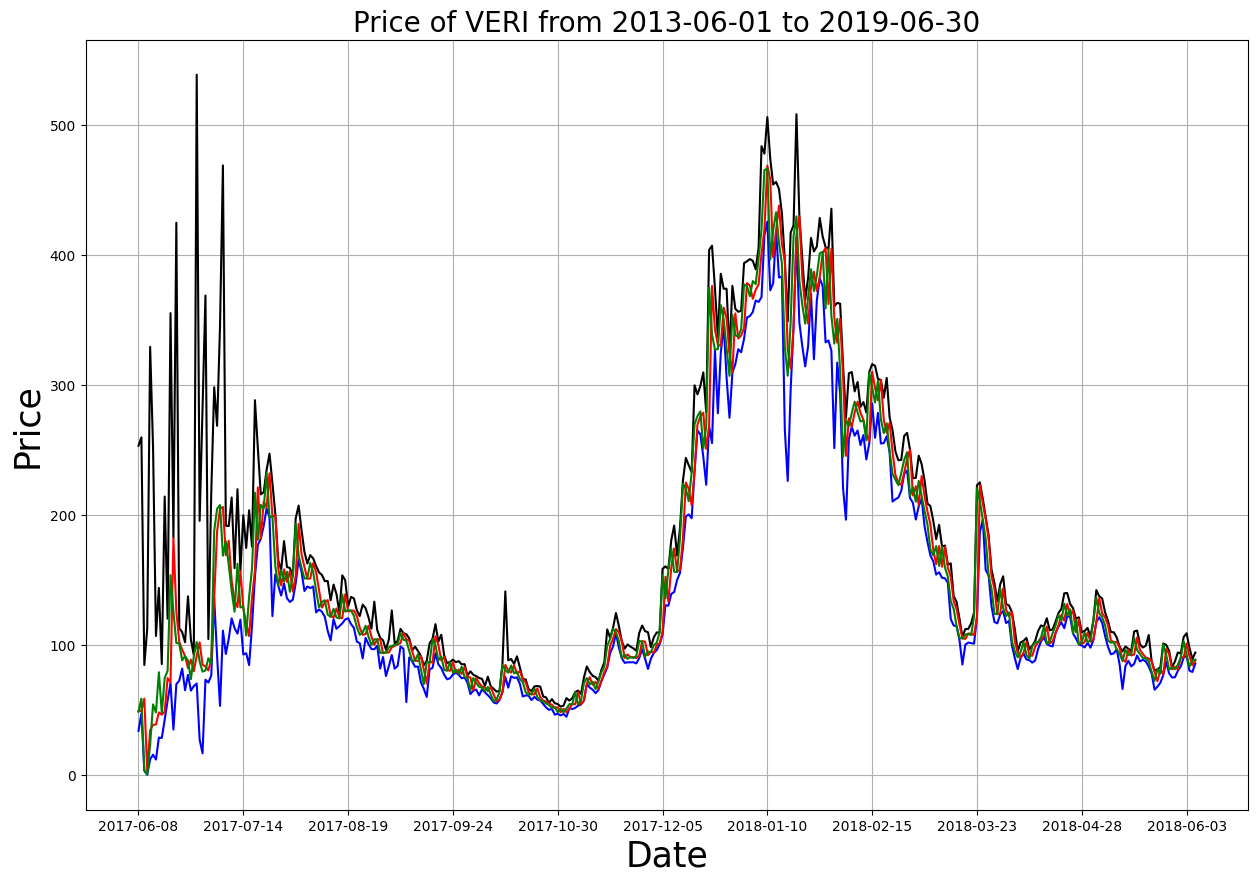

In [51]:
plot_fancy_price_action(coins=coins, symbol='VERI', start_date='2013-06-01', end_date='2019-06-30')

Никакого датасаенса в этом задании нет. Просто аналитик должен уметь строить графики, либо знать готовые инструменты.

## 3. Накачка и сброс (1 балл)

Криптовалютные биржи до сих пор остаются маргинальным местом, эдаким диким западом финансового мира. Как следствие, здесь процветают схемы относительно
честного отъема денег. Одна из них - **pump'n'dump** (накачка и сброс).

Она выглядит следуюшим образом. Несколько крупных игроков или много мелких договариваются вместе купить малоизвестную монету с низкой ценой и объемом торгов. Это приводит к мгновенному взлету цены (pump), далее приходят неопытные игроки в надежде успеть заработать на таком росте. В этот момент организаторы схемы начнают все продавать (dump). Весь процесс занимает от нескольких минут до нескольких часов.

Ваша задача -- **найти самый сильный pump'n'dump** монеты на заданном промежутке времени. Для этого для каждого дня определим число `pnd` равное отношению максимальной цены монеты в данный день к максимуму из цен открытия и закрытия в тот же день. Нужно найти день, когда `pnd` был максимален и величину `pnd`.

In [52]:
def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
    table = coins.loc[coins['symbol'] == symbol][start_date:end_date]
    max_price = table[['open', 'close']].max(axis=1)
    pnd = table.high / max_price
    return pnd.idxmax(), pnd.max()

In [53]:
find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2017-06-01', end_date='2018-06-01')

('2017-11-29', 1.1428940004366206)

Сравните эти значения для разных монет:

In [54]:
for symbol in set(coins.symbol):
    data = find_most_severe_pump_and_dump(coins, symbol, start_date='2017-06-01', end_date='2018-06-01')
    print(data, symbol)

('2018-04-25', 1.8054444587795122) DCR
('2018-02-21', 5.777033492822967) BTG
('2017-12-16', 1.2538461538461536) ICX
('2017-11-23', 1.6658378856041132) QASH
('2017-11-12', 1.099009900990099) USDT
('2017-06-10', 1.232142857142857) NEO
('2017-12-30', 1.8916487255607852) SRN
('2017-08-06', 1.7482936279178192) AE
('2018-04-05', 1.254990051045648) ZRX
('2018-04-07', 1.1777531885963237) CENNZ
('2017-12-17', 1.726864726979804) XVG
('2018-02-07', 1.1082257158899496) LTC
('2017-11-12', 1.783945106058206) BCH
('2017-12-17', 1.2747326203208558) DOGE
('2017-11-29', 1.3861630321910696) SNT
('2017-09-19', 1.8519240136385777) KNC
('2017-06-29', 12.490562327959102) FUN
('2017-09-21', 2.9702777900454884) MANA
('2017-11-02', 1.3641688298886077) POWR
('2017-06-03', 1.2543352601156068) WAVES
('2018-01-02', 1.211764705882353) DRGN
('2018-03-05', 1.4631857737419598) ZIL
('2018-01-05', 1.2808988764044942) ELF
('2017-12-17', 1.359942799461642) DGB
('2017-07-18', 1.1433508255471652) ETH
('2017-10-16', 1.3325105

## 4. Окупаемость инвестиций (1 балл)

Вам нужно посчитать **окупаемость инвестиций (ROI)** в криптовалюты на заданном промежутке времени.

Окупаемость определяется как отношение *изменения цены портфеля* к *исходной цене портфеля*. Цена портфеля - это суммарная стоимость (в USD) всех монет в портфеле.

`investments` - словарь, в котором ключи - это названия монет, значения - это сумма вложений в эту монету (в USD).

In [55]:
def compute_roi(coins, investments, start_date, end_date):
    for key in investments.keys():
        coin = coins[key == coins['symbol']][start_date:end_date]
        num_of_coins = investments[key] / (coin['price'][0])
        result = (num_of_coins * coin['price'][-1]) / investments[key] * 100
        print(f"Окупаемость {key}: {round(result, 2)}%")

In [56]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

Окупаемость BTC: 100.59%
Окупаемость LTC: 88.14%


In [57]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

Окупаемость BTC: 5876.53%
Окупаемость LTC: 3931.94%


## 5. Технический анализ (1 балл)

**Технический анализ** - это способ предсказания поведения графика по некоторым вспомогательным величинам построенным по исходному графику. Один из простейших методов технического анализа - **[границы Боллинджера](https://en.wikipedia.org/wiki/Bollinger_Bands)**. Кто-то верит, что график касаясь границы от него должен отражаться.

Границы считаются очень просто:

$$(MA \pm K\sigma),$$

где `MA` - скользящее среднее за `N` дней, а $\sigma$ - скользящее стандартное отклонение за `N` дней.

Нарисуйте **график цены**, **скользящее среднее** и **границы Боллинджера** c параметрами `N (window) = 21`, `K (width) = 2`.

Тут вам поможет функция `rolling` для подсчёта среднего и стандартного отклонения по скользящему окну.

Не забудьте подписать график и оси, отрисовать легенду и выбрать для нее лучшее расположение.

In [61]:
def plot_bollinger_bands(coins, symbol, window, width):
    data = coins[coins['symbol'] == symbol].copy()

    data['MA'] = data['close'].rolling(window=window).mean()
    data['sigma'] = data['close'].rolling(window=window).std()

    data['Upper'] = data['MA'] + width * data['sigma']
    data['Lower'] = data['MA'] - width * data['sigma']

    fig, ax = plt.subplots(figsize=(15, 10))

    ax.plot(data.index, data['close'], label='Цена', linewidth=2)
    ax.plot(data.index, data['MA'], label=f'Скользящее среднее ({window} дней)', linestyle='--', linewidth=2)
    ax.plot(data.index, data['Upper'], label=f'Верхняя граница Боллинджера', linestyle='--', linewidth=2)
    ax.plot(data.index, data['Lower'], label=f'Нижняя граница Боллинджера', linestyle='--', linewidth=2)

    ax.set_ylabel('Cтоимость', size=15)
    ax.set_xlabel('Дата', size=15)
    ax.set_title(f'Границы Боллинджера для {symbol} ({window} дней, ширина {width})', fontsize=20)
    ax.legend(loc='best')
    ax.grid(True)

    plt.show()


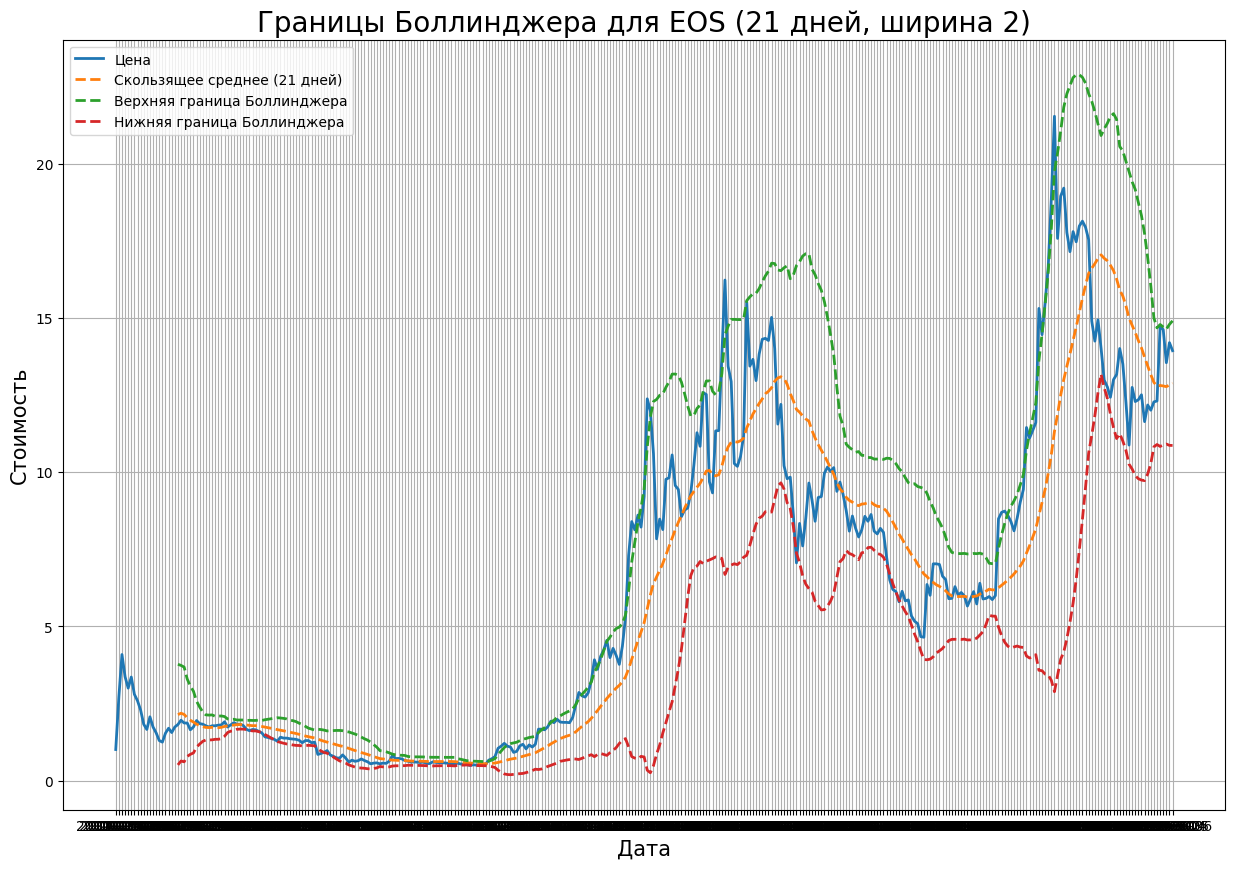

In [62]:
plot_bollinger_bands(coins=coins, symbol='EOS', window=21, width=2)

**Сделайте вывод о том, выполнялось ли правило Боллинджера:**

**Ваш ответ тут**

## 6. Капитализация как индикатор (1 балл)

Многие люди, которые торгуют криптовалютой, любят смотреть на [капитализацию](https://academy.binance.com/ru/articles/crypto-market-capitalization-explained). Давайте поймём почему.

**Нарисуйте еще два графика:**
1. общая капитализация биткойна (BTC), эфира (ETH), еос (EOS), биткойн кэша (BCH), стеллара (XLM) и лайткойна (LTC)
2. доли капитализаций этих монет от общей капитализации рынка.

При этом используйте данные начиная с 2017-07-01.

In [64]:
def plot_coins_capitalizations(coins, symbols, start_date):

    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111)

    plt.title('Капитализация', fontsize=20)

    ax.set_xlabel('Дата', size=20)
    ax.set_ylabel('Общая капитализация', size=20)

    for symbol in symbols:
        market = coins.loc[coins.symbol == symbol, ['market']][start_date:]
        ax.plot(market.index, market, label=symbol)

    ax.set_xticks(market.index.values[::market.shape[0] // 15])

    plt.grid(True)
    plt.show()

    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111)

    plt.title('Доля капитализации от общей капитализации рынка монет', fontsize=20)

    ax.set_xlabel('Дата', size=20)
    ax.set_ylabel('Доля капитализации', size=20)

    market_sum = coins.groupby(coins.index)['market'].sum().loc[start_date:]
    market_sum = pd.DataFrame(data=market_sum.values, columns=['market'], index=market_sum.index)

    for symbol in symbols:
        market = coins.loc[coins.symbol == symbol, ['market']][start_date:]
        market /= market_sum
        ax.plot(market.index, market)

    ax.set_xticks(market_sum.index.values[::market_sum.shape[0] // 15])

    plt.grid(True)
    plt.show()

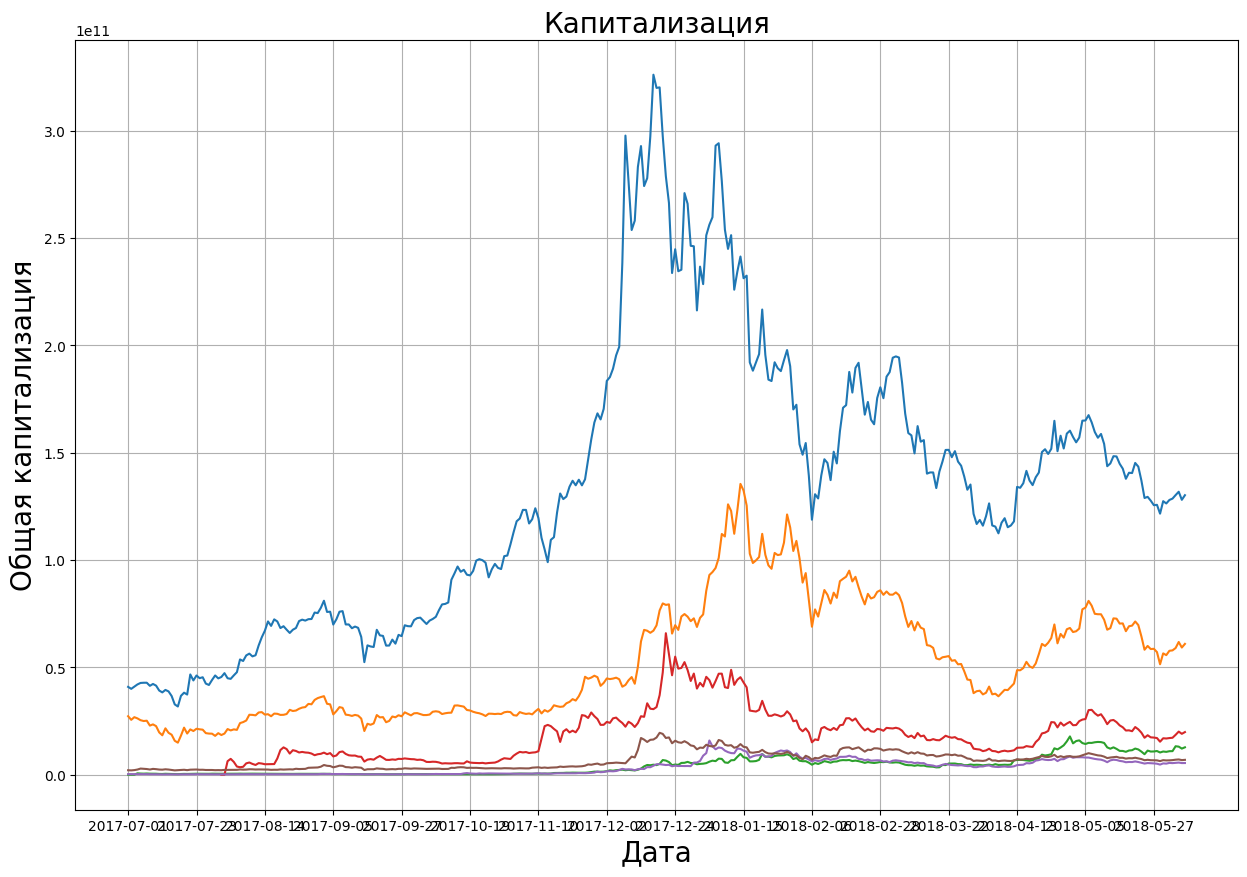

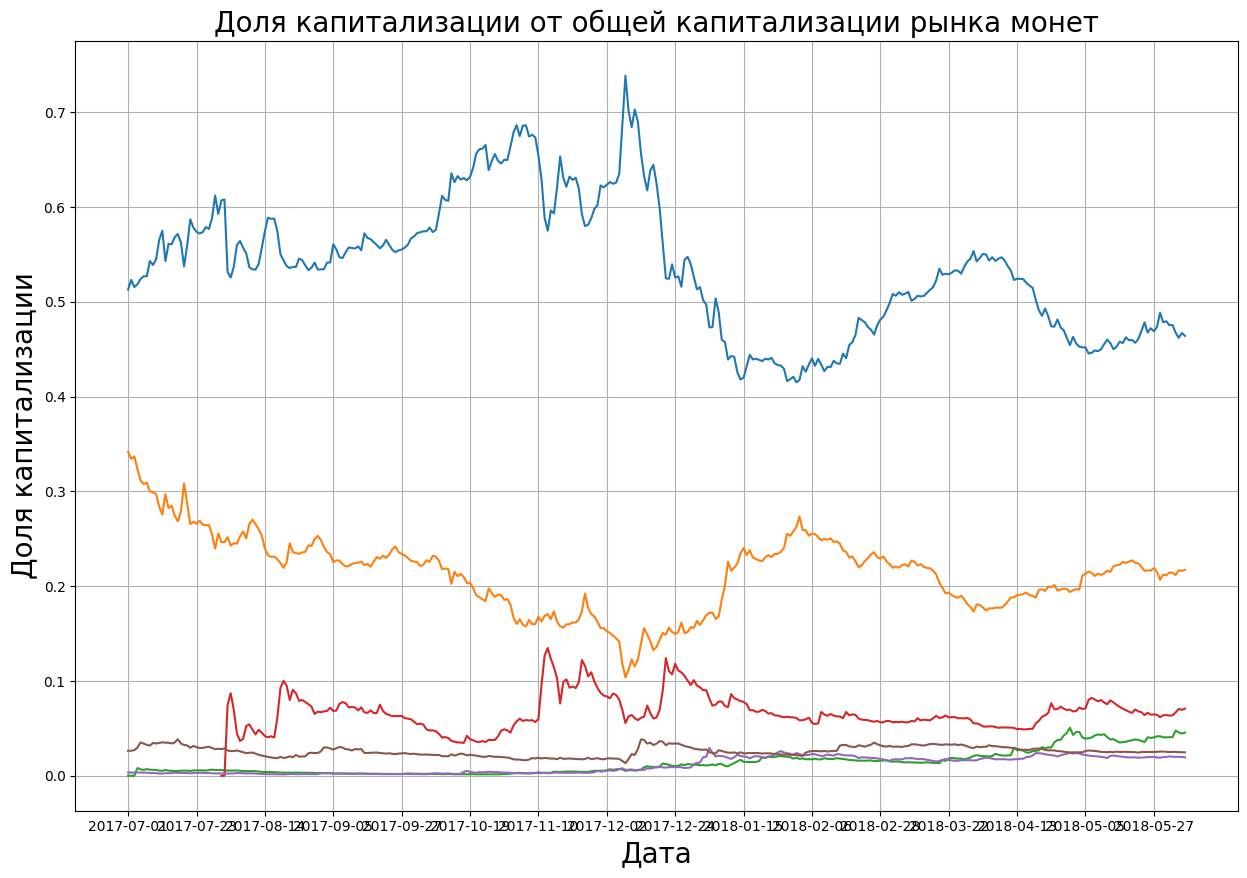

In [65]:
plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

Проанализируйте зависимость доли капитализации альткойнов (остальных монет, кроме биткойна) от доли капитализации биткойна. Как выдумаете, в чём причина такой зависимости?

**Ваш ответ тут**

## 7. Корреляции монет (1 балл)

Теперь нужно подробнее посмотреть на корреляции средних долей капитализаций монет. При этом будем смотреть на среднее сглаженное за последние `window` дней до дня `date` с коэффициентом сглаживания `alpha` для набора монет `symbols`.

Реализуйте функцию, которая будет возвращать квадратный `DataFrame` с числом строк и столбцов, равным числу рассматриваемых монет и со значениями корреляций:

In [73]:
def calc_coins_correlations(coins, date, symbols, window, alpha):
    selected_coins = coins[coins['symbol'].isin(symbols)]
    selected_coins = selected_coins[selected_coins.index <= date]

    smoothed_prices = pd.DataFrame(index=selected_coins.index, columns=symbols)


    for symbol in symbols:
        prices = selected_coins[selected_coins['symbol'] == symbol]['market']
        smoothed_prices[symbol] = prices.ewm(alpha=alpha, adjust=False).mean()

    correlations = smoothed_prices.corr()

    return correlations


In [74]:
correlations = calc_coins_correlations(coins, date="2018-06-06",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-74-5cb301b2dfa8>:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlations.style.background_gradient(cmap='coolwarm').set_precision(2)


,BTC,ETH,EOS,BCH,XLM,LTC,ADA
BTC,1.00,0.93,0.53,0.95,0.85,0.97,0.75
ETH,0.93,1.00,0.73,0.81,0.94,0.96,0.94
EOS,0.53,0.73,1.00,0.54,0.84,0.66,0.55
BCH,0.95,0.81,0.54,1.00,0.74,0.89,0.83
XLM,0.85,0.94,0.84,0.74,1.00,0.91,0.91
LTC,0.97,0.96,0.66,0.89,0.91,1.00,0.85
ADA,0.75,0.94,0.55,0.83,0.91,0.85,1.00


Довольно интересно ещё взглянуть на 2017-12-27:

In [75]:
correlations = calc_coins_correlations(coins, date="2017-12-27",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-75-c2d058096282>:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlations.style.background_gradient(cmap='coolwarm').set_precision(2)


,BTC,ETH,EOS,BCH,XLM,LTC,ADA
BTC,1.00,0.93,0.91,0.94,0.92,0.96,0.90
ETH,0.93,1.00,0.94,0.95,0.79,0.91,0.97
EOS,0.91,0.94,1.00,0.91,0.99,0.98,0.98
BCH,0.94,0.95,0.91,1.00,0.91,0.88,0.87
XLM,0.92,0.79,0.99,0.91,1.00,0.95,0.98
LTC,0.96,0.91,0.98,0.88,0.95,1.00,0.98
ADA,0.90,0.97,0.98,0.87,0.98,0.98,1.00


## 8. Анализ одной стратегии (2 балла)

Разберем один мечтательный пример. Посмотрим какую прибыль могла бы нам принести хрестоматийная торговая стратегия, основанная на скользящих средних.

Стратегия выглядит следующим образом: мы строим две скользящие среднии для графика цены. С маленьким окном (ведущее скользящее среднее) и с бОльшим окном (запаздывающее скользящее среднее). **Мы покупаем, когда ведущее среднее становится больше запаздывающего, и продаем в противном случае.**

Посмотрим на пример:

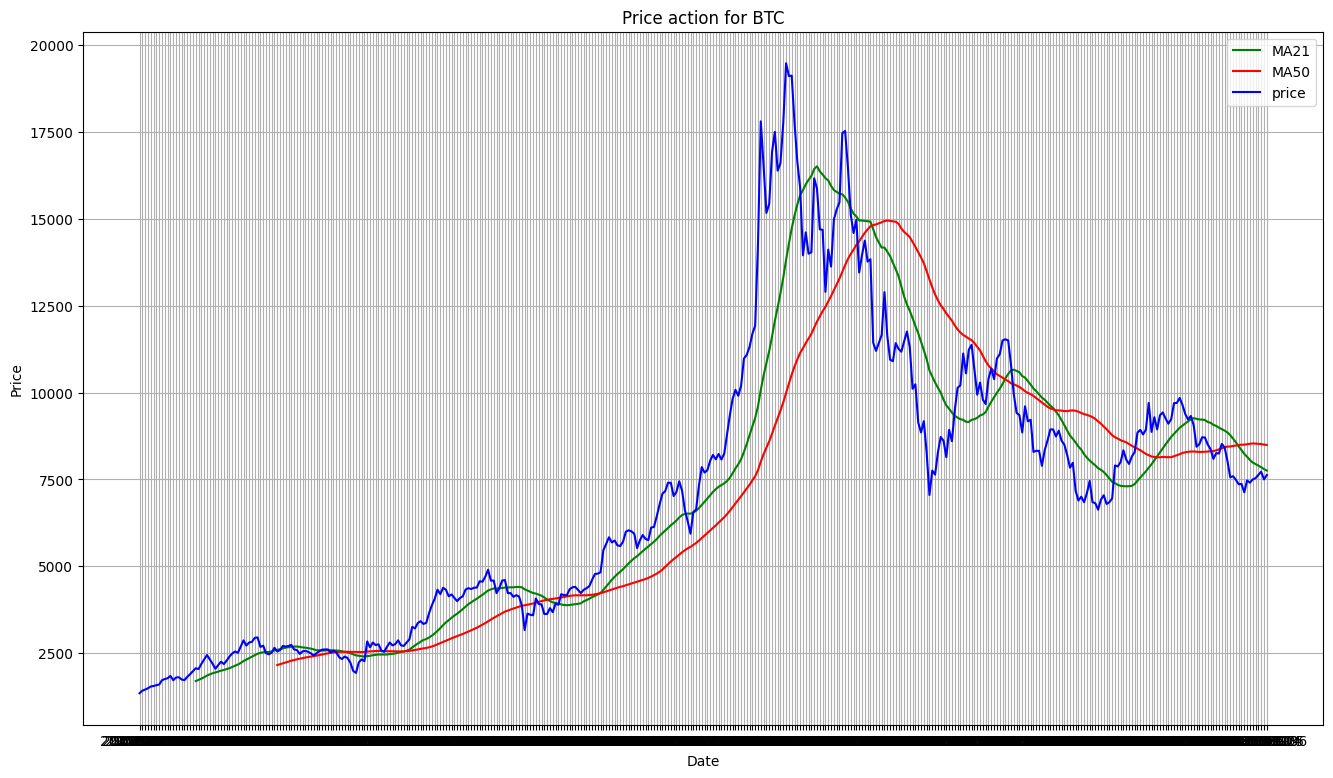

In [76]:
def plot_moving_averages(coins, symbol, leading_window, lagging_window, start_date, end_date):
    coin = coins[coins['symbol'] == symbol][start_date:end_date]
    price = coin['price']
    leading_mean = price.rolling(window=leading_window).mean()
    lagging_mean = price.rolling(window=lagging_window).mean()

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)

    ax.set_title('Price action for {}'.format(symbol))
    ax.plot(leading_mean, color='green', label='MA{}'.format(leading_window))
    ax.plot(lagging_mean, color='red', label='MA{}'.format(lagging_window))
    ax.plot(price, color='blue', label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.grid(True)
    plt.show()

plot_moving_averages(
    coins=coins,
    symbol='BTC',
    leading_window=21,
    lagging_window=50,
    start_date='2017-05-01',
    end_date='2018-08-01')

Видно, что скользящее среднее с бОльшим окном медленнее реагирует на изменение цены. Именно на этой идее и основана торговая стратегия/


**Реализуйте функцию**, которая строит два графика. На правом будут изображены цена и скользящие средние. На левом - во сколько раз изменится размер вложений при использовании нашей стратегии и при обычном инвестировании (купили и держим, смотрим как растет цена наших купленных валют).

Иными словами сравниваем 2 подхода:
- сразу в начальный момент времени купить крипты на все деньги - обычное инвестирование
- ждать подходящих моментов и покупать только в них равными порциями - стратегия

Считайте, что суммарное количество вложенных денег в обоих подходах одинаковое.

>**Примечания:**
>- Давайте использовать только цены закрытия. При этом, чтобы узнать цены за вчерашний день, стоит использовать метод `shift(1)` у `Series`.
>- Отношение цен закрытия за сегодня и за вчера - это **multiplier** за сегодняшний день. При этом давайте строить графики накопления для multiplier-ов. Т.е. если мы смотрим на 3 дня и в первый день multiplier = 1.5, во второй - 0.5 и в третий - 2, то график будет выглядеть так: (1.5, 1.5 * 0.5, 1.5 * 0.5 * 2).
>- При использовании нашей новой стратегии мы будем либо покупать, если ведущее среднее становится больше запаздующего на некоторый `threshold` (при этом лучше разницу сперва поделить на цену), либо оставлять всё как есть. При этом, конечно, нужно, принимая решения за сегодняшний день, смотреть только на статистику из прошлого.

In [79]:
def plot_moving_averages_strategy(
    coins, symbol, lead_window, lag_window, threshold, start_date, end_date
):
    # Последние изменения для работы с виджетами
    symbol_data = coins[coins['symbol'] == symbol].copy()
    symbol_data = symbol_data[start_date:end_date]

    price = symbol_data['close']  # Используем цены закрытия

    leading_mean = price.rolling(window=lead_window).mean()
    lagging_mean = price.rolling(window=lag_window).mean()

    fig, ax1 = plt.subplots(figsize=(16, 9))

    color = 'tab:red'
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Price', color=color)
    ax1.plot(price, color=color, label='Price')
    ax1.plot(leading_mean, color='green', label=f'MA{lead_window}')
    ax1.plot(lagging_mean, color='red', label=f'MA{lag_window}')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.legend(loc='upper left')

    ax2 = ax1.twinx()  # Создаем вторую ось для второго графика
    color = 'tab:blue'
    ax2.set_ylabel('Multiplier', color=color)

    # Здесь добавляем вычисления для мультипликатора
    multiplier = leading_mean / lagging_mean
    ax2.plot(multiplier, color=color, label='Multiplier', linestyle='dashed')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # Уточнение макета

    plt.title(f"Price and Moving Averages for {symbol}")
    plt.show()

In [84]:
# Теперь на основе реализованной функции сделаем интерактивные графики и поизучаем, что получилось:
symbol_selector = ipywidgets.Dropdown(
    options=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'),
    index=0,
    value='BTC',
    layout={'width': '700px'},
    continuous_update=False
)

lead_window_slider = ipywidgets.IntSlider(
    value=21,
    min=1,
    max=200,
    step=1,
    layout={'width': '700px'},
    continuous_update=False)

lag_window_slider = ipywidgets.IntSlider(
    value=50,
    min=1,
    max=200,
    layout={'width': '700px'},
    step=1, continuous_update=False)

threshold_slider = ipywidgets.FloatSlider(
    min=0,
    max=0.20,
    step=0.001,
    value=0.025,
    layout={'width': '700px'},
    continuous_update=False)

start_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2017-05-01'),
    layout={'width': '700px'},
    continuous_update=False
)

end_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2018-01-01'),
    layout={'width': '700px'},
    continuous_update=False
)

ipywidgets.interact(
    plot_moving_averages_strategy,
    coins=ipywidgets.fixed(coins),
    symbol=symbol_selector,
    lead_window=lead_window_slider,
    lag_window=lag_window_slider,
    threshold=threshold_slider,
    start_date=start_date_slider,
    end_date=end_date_slider
)

interactive(children=(Dropdown(description='symbol', layout=Layout(width='700px'), options=('BTC', 'ETH', 'EOS…

<function __main__.plot_moving_averages_strategy(coins, symbol, lead_window, lag_window, threshold, start_date, end_date)>

Попробуйте разные значения параметров для разных монет и сделайте выводы о применимости такой модели:

**Ваш ответ тут**

## 9. Отказ от ответственности

Все примеры разобранных здесь стратегий являются игрушечными и не подходят для реальной торговли на бирже. Без серьезной подготовки вас там съедят с потрохами.